In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import trange, tqdm

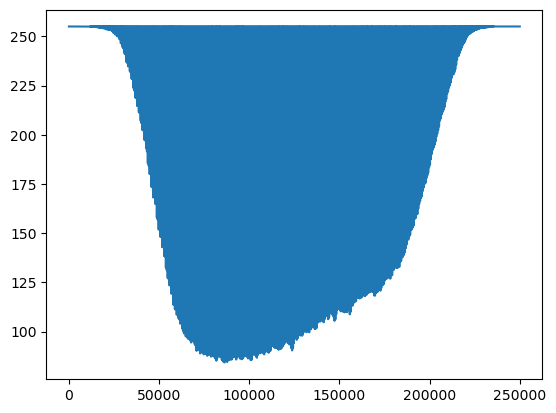

In [2]:
image_path = 'C:/Users/user/PycharmProjects/Fake_fingerprint_detection/dataset_FL/Dermalog_FL/Fake' #demalog - fake
img_list = os.listdir(image_path)

avg = []

for i in img_list :
    img = cv2.imread('C:/Users/user/PycharmProjects/Fake_fingerprint_detection/dataset_FL/Dermalog_FL/Fake/' + i, cv2.IMREAD_COLOR)
    img = np.array(img[:,:,0].reshape(500*500))
    avg.append(img)
    

avg = np.array(avg)
fake_mean = avg.mean(axis = 0)

plt.plot(range(250000), fake_mean)
plt.show()

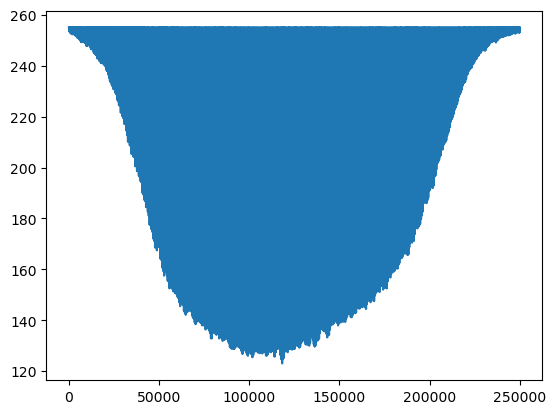

In [3]:
image_path = 'C:/Users/user/PycharmProjects/Fake_fingerprint_detection/dataset_FL/Dermalog_FL/Live' #demalog - live
img_list = os.listdir(image_path)

avg = []

for i in img_list :
    img = cv2.imread('C:/Users/user/PycharmProjects/Fake_fingerprint_detection/dataset_FL/Dermalog_FL/Live/' + i, cv2.IMREAD_GRAYSCALE)
    img = np.array(img.reshape(500*500))
    avg.append(img)

avg = np.array(avg)

live_mean = avg.mean(axis = 0)

plt.plot(range(250000), live_mean)
plt.show()

In [6]:
image_path = 'C:/Users/user/PycharmProjects/Fake_fingerprint_detection/data/train' #demalog - train
img_list = os.listdir(image_path)

arr = []

for i in img_list:
    img = cv2.imread('C:/Users/user/PycharmProjects/Fake_fingerprint_detection/data/train/' + i, cv2.IMREAD_GRAYSCALE)
    img = img.reshape(500*500)
    arr.append(img)

data_arr = []

for i in tqdm(arr):
    data_value = np.unique(i, return_counts=True)
    dv_0 = data_value[0].tolist()
    dv_1 = data_value[1].tolist()

    di = {str(j): 0 for j in dv_0}

    for k in range(len(dv_1)):
        di[str(k)] = dv_1[k]
    data_arr.append(di)

df = pd.DataFrame(data_arr)

100%|██████████| 2750/2750 [00:08<00:00, 307.47it/s]


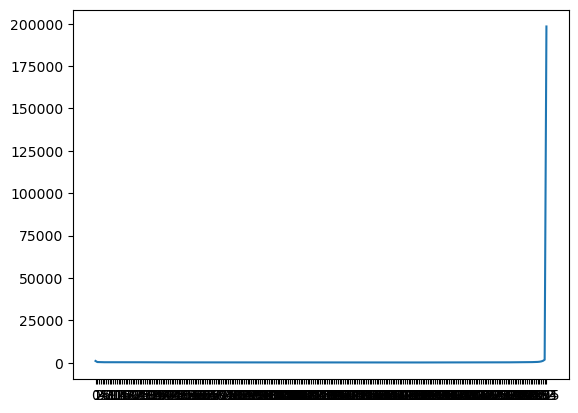

In [7]:
Der_fake_mean = df[:1500].mean()
plt.plot(Der_fake_mean)

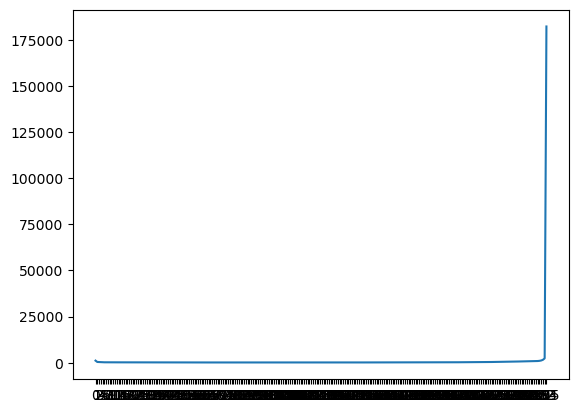

In [8]:
Der_fake_mean = df[1500:].mean()
plt.plot(Der_fake_mean)

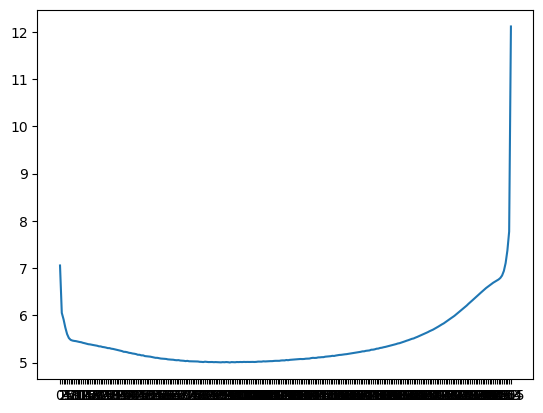

In [9]:
Der_fake_mean = np.log1p(df[1500:].mean())
plt.plot(Der_fake_mean)

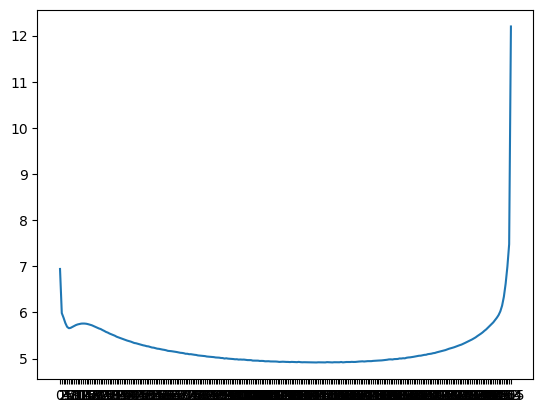

In [10]:
Der_fake_mean = np.log1p(df[:1500].mean())
plt.plot(Der_fake_mean)